# Проверка гипотез по увеличению выручки в интернет-магазине. Оценка результатов A/B теста. #

**Отдел маркетинга, совместно с аналитическим, подготовил список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
pd.set_option('display.max_colwidth', -1)

**Часть 1. Приоритизация гипотез.**

Гипотезы собраны в файле: /datasets/hypothesis.csv

**Задачи:**

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Описание данных:**
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Для более удобной работы названия стобцов принято переводить в нижний регистр.

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()

In [6]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Нзавания столбцов изменены. Тип данных в таблице верный.

**1.1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.**

In [7]:
hypothesis["ICE"] = hypothesis["impact"] * hypothesis["confidence"] / hypothesis["efforts"]
hypothesis[["hypothesis", "ICE"]].sort_values(by = "ICE", ascending = False).round(1)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


**Вывод:**<br>
При оценке "ICE", наиболее приоритетной является гипотеза "Запустить акцию, дающую скидку на товар в день рождения", наименее - "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей".

**1.2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.**

In [8]:
hypothesis["RICE"] = hypothesis["reach"] * hypothesis["impact"] * hypothesis["confidence"] / hypothesis["efforts"]
hypothesis[["hypothesis", "RICE"]].sort_values(by = "RICE", ascending = False).round(1)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:**<br>
При оценке "RICE" наиболее приоритетной является гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", наименее - "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей".

In [9]:
hypothesis.round(1)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2


**1.3. Как изменилась приоритизация гипотез при применении RICE вместо ICE.**

После сравнения методов "ICE" и "RICE" видно, что порядок приоритетных гипотез изменился. Находящаяся на третьем месте при применении "ICE" гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", во втором случае, за счёт широкого охвата (столбец "reach") вышла на первое место. Тот же показатель повлиял и на порядок остальных гипотез. В обоих случаях, наименее приоритетной ялвяется гипотеза "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей".<br>
На основании изложенного можно порекомендовать взять в качестве приоритеных следующие гипотезы:
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (3 место "ICE" и 1 "RICE");
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (в обоих случаях 3 место").<br>

Кроме этого, следует также обратить внимание на гипотезу "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию", которая при применении обоих методов занимает четвёртое место.<br>

Данные гипотезы характеризуются тем, что в обоих случаях либо сохранили, либо улучшили своё место в списке.

**Часть 2. Анализ A/B-теста.**

Результаты A/B-теста описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задачи:**

- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Построить 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Построить 95-й и 99-й перцентили стоимости заказов. Сделать границу для определения аномальных заказов.
- Построить статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- Построить статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Построить статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- Построить статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объяснить его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Описание данных /datasets/orders.csv:**
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**Описание данных /datasets/visitors.csv:**
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

In [10]:
orders = pd.read_csv("/datasets/orders.csv")

In [11]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
visitors = pd.read_csv("/datasets/visitors.csv") 

In [14]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В файле "orders" изменим регистр и названия.

In [16]:
orders.columns = orders.columns.str.lower()

In [17]:
orders = orders.rename(columns = {"transactionid": "transaction_id", "visitorid": "visitor_id"})

In [18]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


В обоих таблицах изменим тип столбца "date".

In [19]:
orders["date"] = pd.to_datetime(orders["date"])
visitors["date"] = pd.to_datetime(visitors["date"])

In [20]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Также проверим пропуски и дубликаты.

In [21]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [22]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [23]:
orders.duplicated().sum()

0

In [24]:
visitors.duplicated().sum()

0

Предобработка проведена. Названия, регистр столбцов и тип данных в них исправлены. Пропусков и дубликатов нет.

**2.1. График кумулятивной выручки по группам.**

Для построения графиков соберём кумулятивные данные.

Создадим массив уникальных пар значений дат и групп теста.

Соберём агрегированные кумулятивные по дням данные о заказах. Для этого получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups.

In [25]:
dates_groups = orders[["date","group"]].drop_duplicates()
orders_agg = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders["date"] <= x["date"], orders["group"] == x["group"])].agg(
        {
            "date" : "max",
            "group" : "max",
            "transaction_id" : "nunique",
            "visitor_id" : "nunique",
            "revenue" : "sum"}), axis=1,
).sort_values(by = ["date","group"])

visitors_agg = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors["date"] <= x["date"], visitors["group"] == x["group"])].agg(
        {
            "date": "max",
            "group": "max",
            "visitors": "sum"}),
    axis = 1,
).sort_values(by = ["date", "group"])

Объединяем две таблицы в одну.

In [26]:
cum_data = orders_agg.merge(
    visitors_agg, left_on = ["date", "group"], right_on = ["date", "group"]
)
cum_data.columns = ["date", "group", "orders", "buyers", "revenue", "visitors"]
cum_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

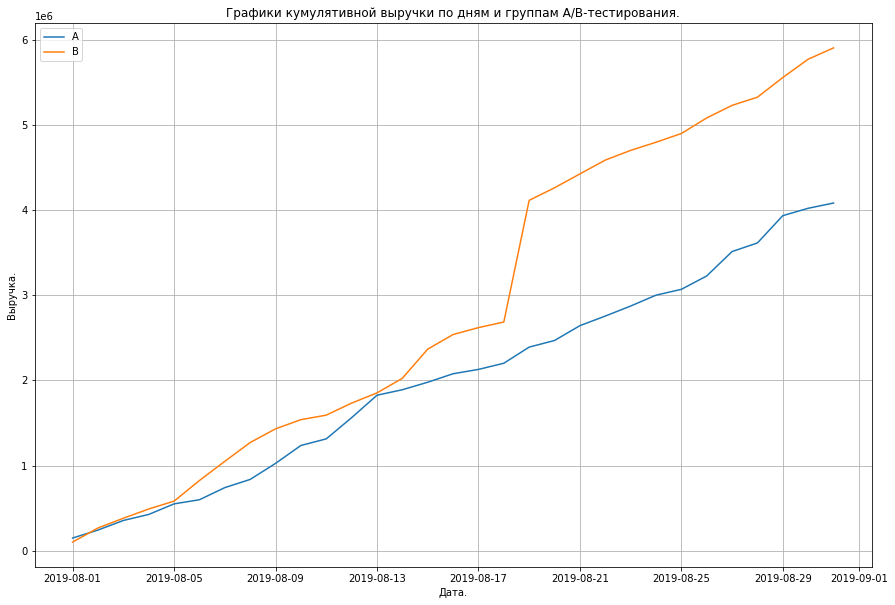

In [27]:
cum_revenue_a = cum_data[cum_data["group"] == "A"][["date","revenue", "orders"]]

cum_revenue_b = cum_data[cum_data["group"] == "B"][["date","revenue", "orders"]]

plt.figure(figsize = (15, 10))
plt.grid()

plt.plot(cum_revenue_a["date"], cum_revenue_a["revenue"], label = "A")

plt.plot(cum_revenue_b["date"], cum_revenue_b["revenue"], label = "B")

plt.title("Графики кумулятивной выручки по дням и группам A/B-тестирования.")
plt.xlabel("Дата.")
plt.ylabel("Выручка.")
plt.legend()

**Вывод:**<br>
Выручка равномерно и стабильно растёт на протяжении всего периода тестирования. Наблюдается постоянное расхождение графиков двух групп, группа "B" стабильно выше группы "A" и различие увеличивается. Исключение составляет 13 авуста, когда графики на короткое время сошлись. Кроме этого, у группы "B" наблюдается резкий всплеск 18 и 19 августа. Возможно, тут всплеск числа заказов либо рост цены отдельных заказов. Необычно, что это касается только группы "B".

**2.2. График кумулятивного среднего чека по группам.**

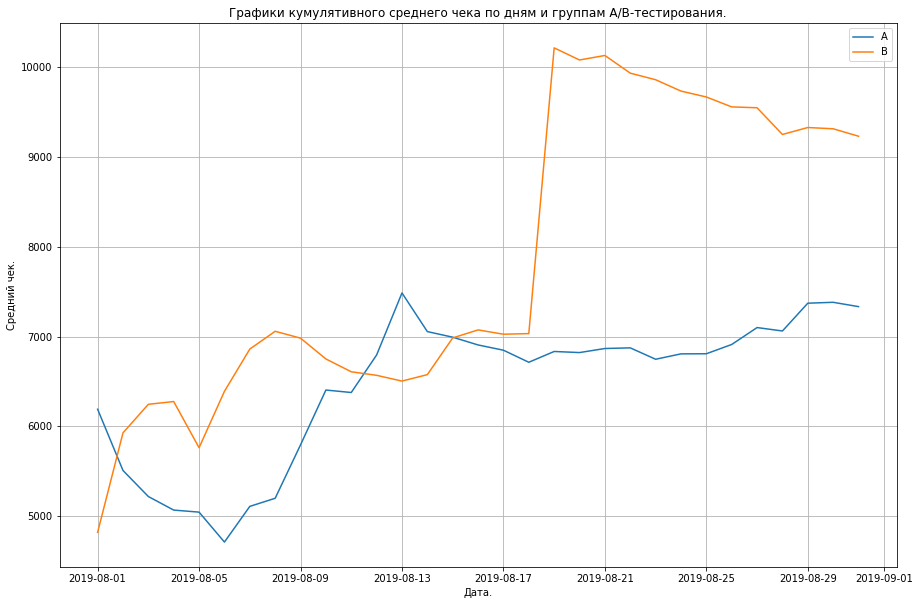

In [28]:
plt.figure(figsize = (15, 10))
plt.grid()

plt.plot(cum_revenue_a["date"], cum_revenue_a["revenue"] / cum_revenue_a["orders"], label = "A")
plt.plot(cum_revenue_b["date"], cum_revenue_b["revenue"] / cum_revenue_b["orders"], label = "B")

plt.title("Графики кумулятивного среднего чека по дням и группам A/B-тестирования.")
plt.xlabel("Дата.")
plt.ylabel("Средний чек.")
plt.legend()

**Вывод:**<br>
График суммы среднего чека характеризуется нестабильностью всю первую половину периода тестирования. Наблюдаются провалы и взлёты. Особенно, это касается группы "A". Со второй половины, показатели этой группы стабилизировались с тенденцией к росту. Что касается группы "B", то у неё также, как и на предыдущем графике, и в это же время, наблюдается резкий скачок суммы среднего чека, после чего показатели это группы стабилизровались и начали снижаться. Скорее всего, это связано с увеличением количества продаж либо с несколькими дорогими покупками. Учитывая, что всплеск происходил на протяжении всего одного или двух дней, можно предположить, что тут была проведена какая-то акция, которая стимулировала спрос. Возможен также какой-то технический сбой. После всплеска данные стали возвращаться к нормальным показателям, поэтому и идёт снижение.<br>
В целом, показатели группы "B" стабильно выше показателей группы "A". Исключение, как и на предыдущем графике, составляет 13 августа, когда у группы "B" наблюдался провал, а у группы "A" наоборот подьём.

**2.3. График относительного изменения кумулятивного среднего чека группы B к группе A.**

Соберём данные в одну таблицу.

Text(0, 0.5, 'Соотношение средних чеков')

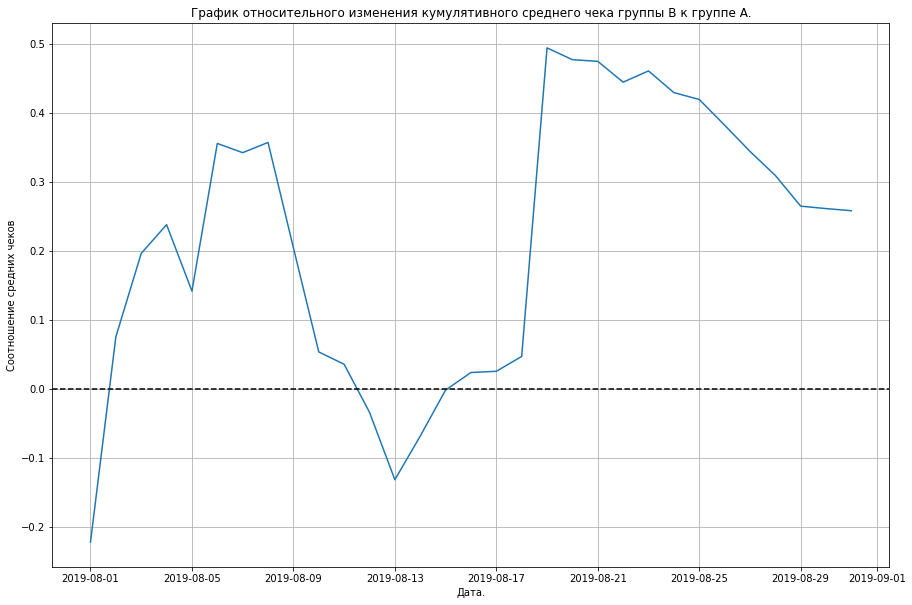

In [29]:
merged_cum_revenue = cum_revenue_a.merge(cum_revenue_b, left_on = "date", right_on = "date", how = "left", suffixes = ["A", "B"])

plt.figure(figsize = (15, 10))
plt.grid()
plt.plot(merged_cum_revenue["date"],
         (merged_cum_revenue["revenueB"]/
          merged_cum_revenue["ordersB"])/
         (merged_cum_revenue["revenueA"]/
          merged_cum_revenue["ordersA"])-1)

plt.axhline(y = 0, color = "black", linestyle = "--")
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A.")
plt.xlabel("Дата.")
plt.ylabel("Соотношение средних чеков")

**Вывод:**<br>
В целом, показатели группы "B" стабильно выше показателей группы "A". На графике видны два пика: 6-8  и особенно 18 и 19 августа. В этой связи интересен провал 13 август, когда результаты группы "B" снизились, а результаты группы "A", наоборот, выросли.

**2.4. График кумулятивного среднего количества заказов на посетителя по группам.**

(0.0, 0.05)

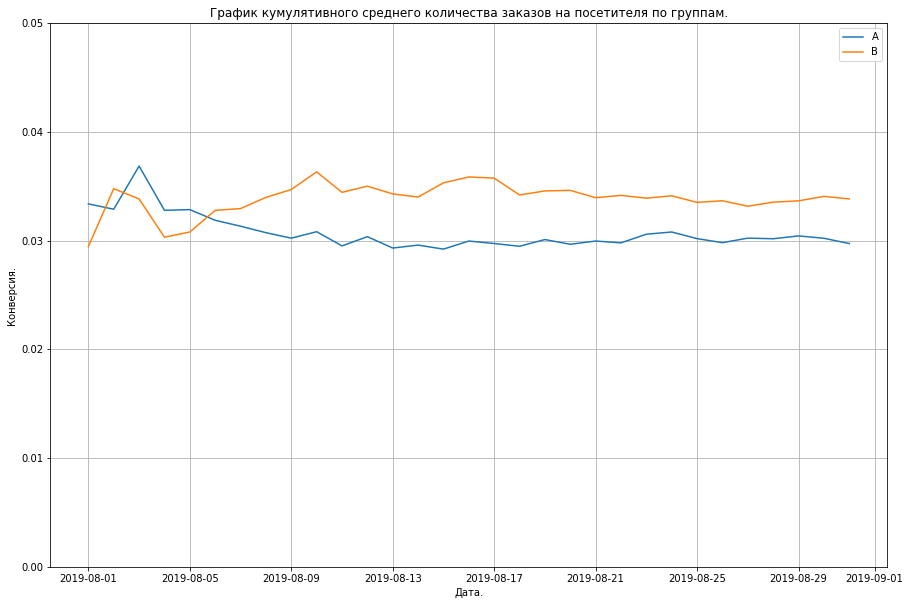

In [30]:
cum_data["conversion"] = cum_data["orders"]/cum_data["visitors"]

cum_data_a = cum_data[cum_data["group"] == "A"]
cum_data_b = cum_data[cum_data["group"] == "B"]

plt.figure(figsize = (15, 10))
plt.grid()
plt.plot(cum_data_a["date"], cum_data_a["conversion"], label = "A")
plt.plot(cum_data_b["date"], cum_data_b["conversion"], label = "B")
plt.title("График кумулятивного среднего количества заказов на посетителя по группам.")
plt.xlabel("Дата.")
plt.ylabel("Конверсия.")
plt.legend()
plt.ylim(0, 0.05)

**Вывод:**<br>
В начале периода показатели обеих групп колебались, были скачки и падения. В группе "B" вначале наблюдался заметный рост до 2 августа, после чего начался спад. Однако, примерно, с 4 мая показатели начали расти и с 6 мая группа выходит вперёд, у неё наблюдается рост до 10 мая. Дальше, после небольшого снижения, её график стабилизировался.<br>
Показатели группы "A", наоборот, с 4 мая начинают снижаться. Такое снижение идёт до 9 августа, после чего, показатели стабилизровались.

**2.5. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.**

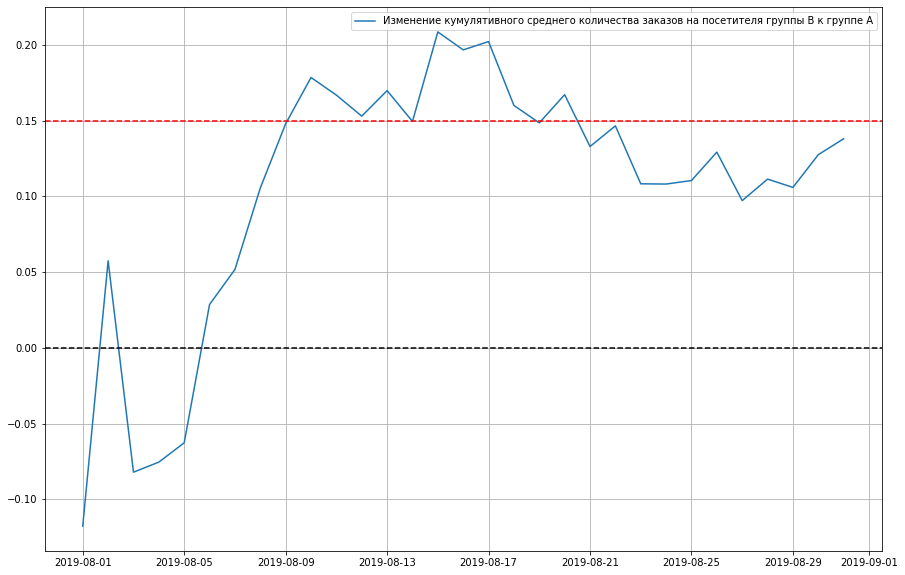

In [31]:
merged_cum_conversions = cum_data_a[["date", "conversion"]].merge(
    cum_data_b[["date", "conversion"]],
    left_on = "date",
    right_on = "date",
    how = "left",
    suffixes = ["A", "B"])

plt.figure(figsize = (15, 10))
plt.grid()
plt.plot(merged_cum_conversions["date"], merged_cum_conversions["conversionB"]/merged_cum_conversions["conversionA"] - 1, label = "Изменение кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.legend()
plt.axhline(y = 0, color = "black", linestyle = "--")
plt.axhline(y = 0.15, color = "red", linestyle = "--")

**Вывод:**<br>
В начале теста показатели группы "B" были заметно ниже показателей группы "A". Но у них наблюдался рост до 2 августа, после чего наступило снижение до 3 августа. Далее начался уверенный рост до 15 вгуста с небольшими колебаниями с 10 по 13 августа. С 17 августа началось снижение, которое продолжалось до 29 августа, после чего вновь наметилась тенденция к росту.<br>
В целом, график характеризуется нестабильностью, видимо соотношение конверсии ещё не установилось.

**2.6. Точечный график количества заказов по пользователям.**

Из-за того, что на графиках группы "B" наблюдаются резкие скачки, можно предположть наличие в данных аномальных значений. Проверим изх наличие.

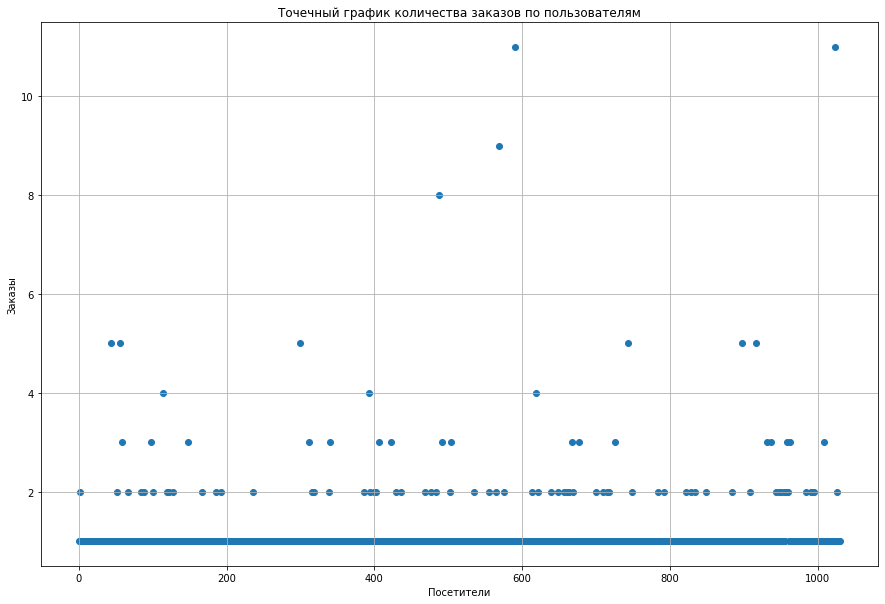

In [32]:
orders_users = (
    orders.groupby("visitor_id", as_index = False)
    .agg({"transaction_id": "nunique"})
)
orders_users.columns = ["visitor_id", "orders"]

plt.figure(figsize = (15, 10))
plt.grid()
plt.title("Точечный график количества заказов по пользователям")
plt.xlabel("Посетители")
plt.ylabel("Заказы")
x_values = pd.Series(range(0,len(orders_users)))
plt.scatter(x_values, orders_users["orders"])

**Вывод:**<br>
Большинство посетителей сайта совершает один заказ. Меньшее число два заказа. Дальше количество начинает заметно уменьшаться. В целом посетители не делают более пяти заказов. При этом наблюдаются несколько выбросов свыше восьми заказов.<br>
Необычно, что совершающих пять заказов больше, чем тех, кто делает четыре.

**2.7. 95-й и 99-й перцентили количества заказов на пользователя.**

In [33]:
np.percentile(orders_users["orders"], [95, 99])

array([2., 4.])

**Вывод:**<br>
Не более 1% посетителей сайта совершают более четырёх покупок. Примем это количество за верхную границу. Всё, что свыше будет считаться выбросом.

**2.8. Точечный график стоимостей заказов.**

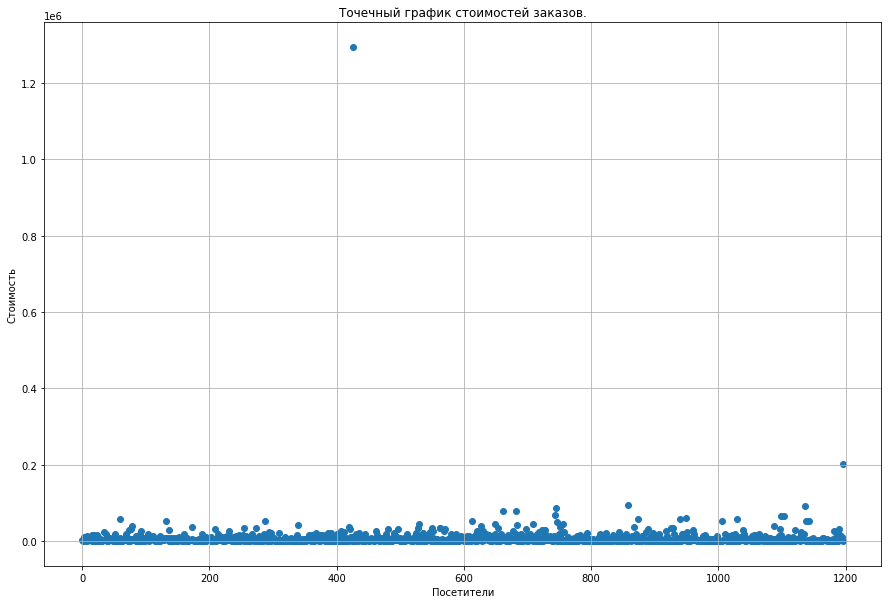

In [34]:
plt.figure(figsize = (15, 10))
plt.grid()
plt.title("Точечный график стоимостей заказов.")
plt.xlabel("Посетители")
plt.ylabel("Стоимость")
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders["revenue"])

На графике есть явные выбросы, но он имеет слишком большой масштаб, чтобы более точно оценить количество заказов. Увеличим масштаб. Учитывая, что первый заметный выброс находится на отметке 0,2, установим этот показатель в качестве ориентира.

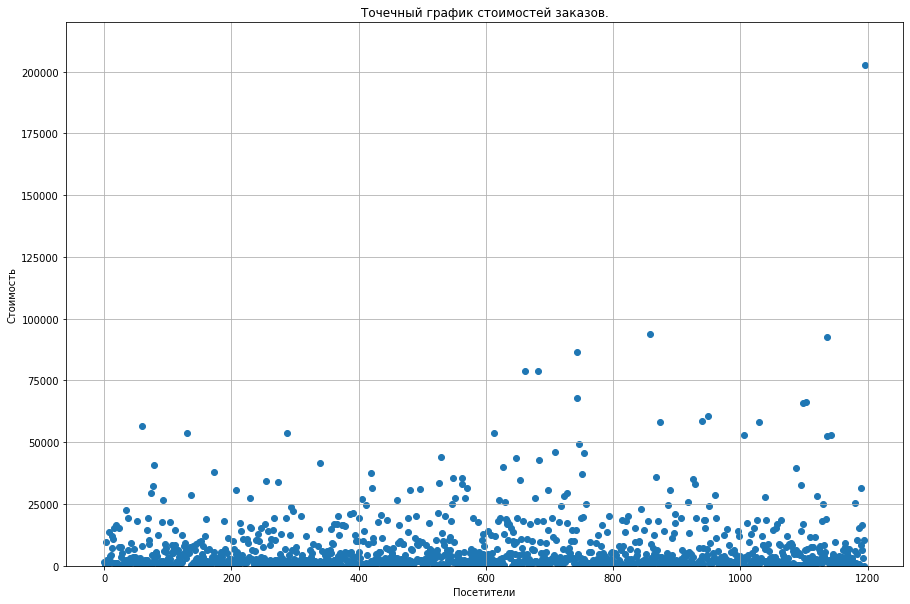

In [35]:
plt.figure(figsize = (15, 10))
plt.grid()
plt.title("Точечный график стоимостей заказов.")
plt.xlabel("Посетители")
plt.ylabel("Стоимость")
plt.ylim(0, 220000)
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders["revenue"])

Всё равно, достаточно мелко. Ещё увеличим масштаб.

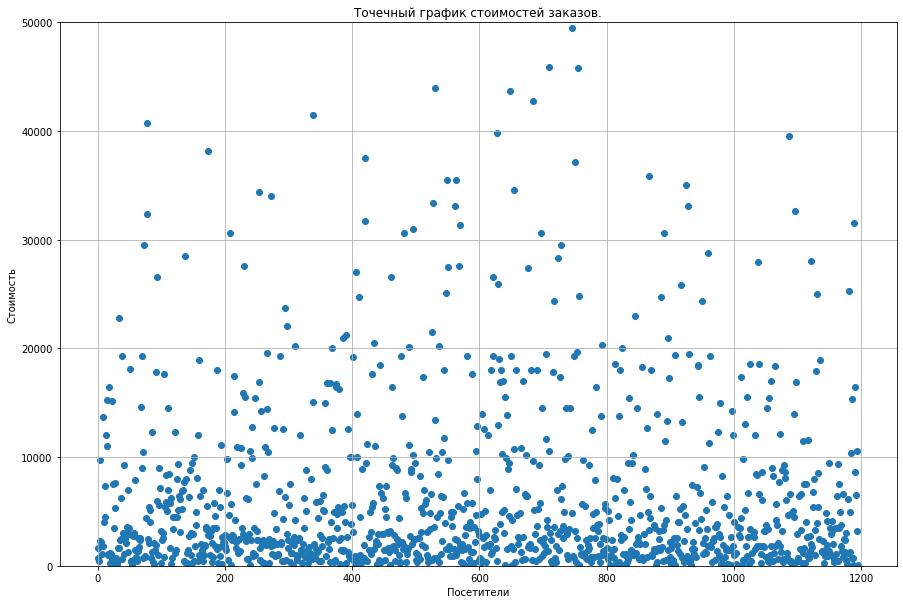

In [36]:
plt.figure(figsize = (15, 10))
plt.grid()
plt.title("Точечный график стоимостей заказов.")
plt.xlabel("Посетители")
plt.ylabel("Стоимость")
plt.ylim(0, 50000)
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders["revenue"])

**Вывод:**<br>
Большинство посетителей сайта делают заказы стоимостью до 5 тыс. Далее их количество начинает уменьшаться. Большинство покупок попадает в диапазон до 50 тыс. Есть несколько аномально дорогих заказов, которые дороже этой суммы, в том числе дороже 200 тыс., а также стоимостью около 1,5 млн. Что касается последних двух заказов, то тут вполне возможна какая-то техническая ошибка.

**2.9. 95-й и 99-й перцентили стоимости заказов.**

In [37]:
np.percentile(orders["revenue"], [95, 99])

array([28000. , 58233.2])

**Вывод:**<br>
Не более 5% заказов на сайте имеют стоимость дороже 28 тыс. и не более одного 1% дороже 58 233. Учитывая, что такая цена очень небычна для покупок в интернете, установим границу в 28 тыс. Всё, что свыше будет считаться выбросом.

**2.10. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.**

Итак, по результатам проведённых исследований, выяснилось, что в данных, скорее всего, есть выбросы. Посчитаем статистическую значимость различий в среднем количестве заказов на пользователя, пока по «сырым» данным — без удаления аномалий.

Для этого сформулируем гипотезы.<br>
Нулевая: различий в среднем количестве заказов между группами нет.<br>
Альтернативная: различия в среднем между группами есть.

Рассчитаем количество пользователей в выбранную дату по группам. 

In [38]:
visitors_daily_a = visitors[visitors["group"] == "A"][["date", "visitors"]]
visitors_daily_a.columns = ["date", "vis_per_date_a"]

visitors_cum_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a["date"] <= x["date"]].agg(
        {"date": "max", "vis_per_date_a": "sum"}
    ),
    axis=1,
)
visitors_cum_a.columns = ["date", "visitors_cum_a"]

visitors_daily_b = visitors[visitors["group"] == "B"][["date", "visitors"]]
visitors_daily_b.columns = ["date", "vis_per_date_b"]

visitors_cum_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b["date"] <= x["date"]].agg(
        {"date": "max", "vis_per_date_b": "sum"}
    ),
    axis=1,
)
visitors_cum_b.columns = ["date", "visitors_cum_b"]

Также посчитаем количество заказов и суммарной выручки в выбранную дату по группам.

In [39]:
orders_daily_a = (
    orders[orders["group"] == "A"][["date", "transaction_id", "visitor_id", "revenue"]]
    .groupby("date", as_index = False)
    .agg({"transaction_id": pd.Series.nunique, "revenue": "sum"})
)
orders_daily_a.columns = ["date", "od_per_date_a", "rev_per_date_a"]

orders_cum_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a["date"] <= x["date"]].agg(
        {"date": "max", "od_per_date_a": "sum", "rev_per_date_a": "sum"}
    ),
    axis = 1,
).sort_values(by = ["date"])
orders_cum_a.columns = [
    "date",
    "od_cum_a",
    "rev_cum_a",
]

orders_daily_b = (
    orders[orders["group"] == "B"][["date", "transaction_id", "visitor_id", "revenue"]]
    .groupby("date", as_index = False)
    .agg({"transaction_id": pd.Series.nunique, "revenue": "sum"})
)
orders_daily_b.columns = ["date", "od_per_date_b", "rev_per_date_b"]

orders_cum_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b["date"] <= x["date"]].agg(
        {"date": "max", "od_per_date_b": "sum", "rev_per_date_b": "sum"}
    ),
    axis=1,
).sort_values(by = ["date"])
orders_cum_b.columns = [
    "date",
    "od_cum_b",
    "rev_cum_b",
]

Объединим всё в одну таблицу.

In [40]:
data = (
    orders_daily_a.merge(
        orders_daily_b, left_on = "date", right_on = "date", how = "left"
    )
    .merge(orders_cum_a, left_on = "date", right_on = "date", how = "left")
    .merge(orders_cum_b, left_on = "date", right_on = "date", how = "left")
    .merge(visitors_daily_a, left_on = "date", right_on = "date", how = "left")
    .merge(visitors_daily_b, left_on = "date", right_on = "date", how = "left")
    .merge(visitors_cum_a, left_on = "date", right_on = "date", how = "left")
    .merge(visitors_cum_b, left_on = "date", right_on = "date", how = "left")
)

In [41]:
data.head()

,date,od_per_date_a,rev_per_date_a,od_per_date_b,rev_per_date_b,od_cum_a,rev_cum_a,od_cum_b,rev_cum_b,vis_per_date_a,vis_per_date_b,visitors_cum_a,visitors_cum_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            31 non-null     datetime64[ns]
 1   od_per_date_a   31 non-null     int64         
 2   rev_per_date_a  31 non-null     int64         
 3   od_per_date_b   31 non-null     int64         
 4   rev_per_date_b  31 non-null     int64         
 5   od_cum_a        31 non-null     int64         
 6   rev_cum_a       31 non-null     int64         
 7   od_cum_b        31 non-null     int64         
 8   rev_cum_b       31 non-null     int64         
 9   vis_per_date_a  31 non-null     int64         
 10  vis_per_date_b  31 non-null     int64         
 11  visitors_cum_a  31 non-null     int64         
 12  visitors_cum_b  31 non-null     int64         
dtypes: datetime64[ns](1), int64(12)
memory usage: 3.4 KB


**Описание данных:**
- date — дата;
- od_per_date_a — количество заказов в выбранную дату в группе "A";
- rev_per_date_a — суммарная выручка в выбранную дату в группе "A";
- od_per_date_b — количество заказов в выбранную дату в группе "B";
- rev_per_date_b — суммарная выручка в выбранную дату в группе "B";
- od_cum_a — суммарное число заказов до выбранной даты включительно в группе "A";
- rev_cum_a — суммарная выручка до выбранной даты включительно в группе "A";
- od_cum_b — суммарное количество заказов до выбранной даты включительно в группе "B";
- rev_cum_b — суммарная выручка до выбранной даты включительно в группе "B";
- vis_per_date_a — количество пользователей в выбранную дату в группе "A";
- vis_per_date_b — количество пользователей в выбранную дату в группе "B";
- visitors_cum_a — количество пользователей до выбранной даты включительно в группе "A";
- visitors_cum_b — количество пользователей до выбранной даты включительно в группе "B".

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

Создадим переменные orders_users_a и orders_users_b со столбцами ["visitor_id", "orders"]. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [43]:
orders_users_a = (
    orders[orders["group"] == "A"]
    .groupby("visitor_id", as_index = False)
    .agg({"transaction_id": pd.Series.nunique})
)
orders_users_a.columns = ["visitor_id", "orders"]

orders_users_b = (
    orders[orders["group"] == "B"]
    .groupby("visitor_id", as_index = False)
    .agg({"transaction_id": pd.Series.nunique})
)
orders_users_b.columns = ["visitor_id", "orders"]

Также объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.<br>
Посчитаем p-value. Установим уровень значимости: 0,05.

In [44]:
sample_a = pd.concat([orders_users_a["orders"],
                      pd.Series(0, index = np.arange(
                          data["vis_per_date_a"].sum() -
                          len(orders_users_a["orders"])), name = "orders")], axis=0)

sample_b = pd.concat([orders_users_b["orders"],
                      pd.Series(0, index = np.arange(
                          data["vis_per_date_b"].sum() -
                          len(orders_users_b["orders"])), name = "orders")], axis=0)

print("P-value =", "{0:.3f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))

print("Различие в среднем количестве заказов на посетителя между группами по «сырым» данным:",
      "{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

P-value = 0.017
Различие в среднем количестве заказов на посетителя между группами по «сырым» данным: 0.138


**Вывод:**<br>
P-value меньше 0,05. Нулевая гипотеза не потдверждается, различие в среднем количестве заказов между группами "A" и "B" есть. Группа "B" превосходит группу "A" на 13,8%.

**2.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.**

Нулевая гипотеза: различий в среднем чеке между группами нет.<br>
Альтернативная гипотеза: различия в среднем чеке между группами есть.<br>
Уровень значимости: 0,05.

In [45]:
print("P-value =", "{0:.3f}".format(st.mannwhitneyu(
    orders[orders["group"] == "A"]["revenue"],
    orders[orders["group"] == "B"]["revenue"])[1]))

print("Различие в среднем чеке заказа между группами по «сырым» данным:",
      "{0:.3f}".format(
          orders[orders["group"] == "B"]["revenue"].mean()/
          orders[orders["group"] == "A"]["revenue"].mean()-1))

P-value = 0.729
Различие в среднем чеке заказа между группами по «сырым» данным: 0.259


**Вывод:**<br>
P-value значительно выше 0,05. Нулевая гипотеза подтверждается. Различий в среднем чеке между группами нет.

**2.12. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**

Ране, после проведённых расчётов, выяснилось, что не более 1% посетителей сайта делают более 4 покупок и не более 5% заказов имеют стоимость более 28 тыс. Примем эти показатели в качестве верхней границы и всё, что выше будет считаться аномалией.

Сделаем срезы пользователей с числом заказов больше 4 и пользователей, совершивших заказы дороже 28 тыс.

In [46]:
many_orders = pd.concat([
    orders_users_a[orders_users_a["orders"] > 4]['visitor_id'],
    orders_users_b[orders_users_b["orders"] > 4]['visitor_id']], axis = 0)
expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']
abnormal_users = (pd.concat([
    many_orders,
    expensive_orders], axis=0)
            .drop_duplicates()
            .sort_values())

In [47]:
abnormal_users.head()

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitor_id, dtype: int64

In [48]:
abnormal_users.shape[0]

59

Всего 59 аномальных показателей.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [49]:
filtered_a = pd.concat([
    orders_users_a[np.logical_not(
        orders_users_a["visitor_id"]
        .isin(abnormal_users))]["orders"],
    pd.Series(0, index = np.arange(data["vis_per_date_a"].sum() -
                                 len(orders_users_a["orders"])), name = "orders")], axis = 0)

filtered_b = pd.concat([
    orders_users_b[np.logical_not(
        orders_users_b["visitor_id"]
        .isin(abnormal_users))]["orders"],
    pd.Series(0, index = np.arange(data["vis_per_date_b"].sum() -
                                 len(orders_users_b["orders"])), name = "orders")], axis = 0)

Нулевая гипотеза: различий в среднем чеке между группами нет.<br>
Альтернативная гипотеза: различия в среднем чеке между группами есть.<br>
Уровень значимости: 0,05.

In [51]:
print("p-value =", "{0:.3f}".format(st.mannwhitneyu(filtered_a, filtered_b)[1]))

print("Различие в среднем чеке заказа между группами по «очищенным» данным:",
      "{0:.3f}".format(filtered_b.mean() / filtered_a.mean()-1))

p-value = 0.018
Различие в среднем чеке заказа между группами по «очищенным» данным: 0.145


**Вывод:**<br>
P-value меньше 0,05. Нулевую гипотезу можно отвергнуть. Различие между группами есть. Группа "B" больше группы "A" на 14,5%.

**12.13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

Нулевая гипотеза: различий в среднем чеке между группами нет.<br>
Альтернативная гипотеза: различия в среднем чеке между группами есть.<br>
Уровень значимости: 0,05.

In [52]:
print("p-value =", "{0:.3f}".format(st.mannwhitneyu(orders[np.logical_and(orders["group"] == "A",
        np.logical_not(orders["visitor_id"].isin(abnormal_users)))]["revenue"],orders[np.logical_and(
        orders["group"] == "B",
        np.logical_not(orders["visitor_id"].isin(abnormal_users)))]["revenue"])[1]))

print("Различие в среднем чеке заказа между группами по «очищенным» данным:",
      "{0:.3f}".format(orders[np.logical_and(orders["group"] == "B",
        np.logical_not(orders["visitor_id"].isin(abnormal_users)))]["revenue"].mean() /
    orders[np.logical_and(orders["group"] == "A",
        np.logical_not(orders["visitor_id"].isin(abnormal_users)))]["revenue"].mean() - 1))

p-value = 0.961
Различие в среднем чеке заказа между группами по «очищенным» данным: -0.014


**Вывод:**<br>
P-value значительно выше 0,05. Нулевая гипотеза подтверждается. Различий в среднем чеке между группами нет. При этом средний чек группы "A" незначительно больше среднего чека группы "B".

**Общий вывод.**

Разница в среднем количестве заказов на посетителя между группами по «сырым» данным составляет 13,8%, а в среднем чеке 25,9% в пользу группы "B". После удаления из данных аномальных значений, разница в количестве заказов стала составлять 12,7% с перимуществом в ту же сторону, а средний чек изменился и стал составлять 1,4% в пользу группы "A".

На основании изложенного можно сделать такие выводы:<br>
1. Разница по среднему количеству заказов между группами по «сырым» данным, и после фильтрации аномалий сильно не изменилась.;<br>
2. Разница по среднему чеку по «сырыми» данными и после фильтрации аномалий заметно изменилась. Появился, хоть и не значительный перевес другой группы. По этим данным видно, насколько сильно аномальные значения могут влиять на показатели.;<br>
3. Графики кумулятивной выручки, кумулятивного среднего чека и кумулятивного среднего количества заказов на посетителя между группами показывают, что результаты группы "B" значительно лучше результатов группы "A". Тенденции к улучшению показателей группы "A" не наблюдается. Графики, в целом, стабилизировались.

Несмотря на то, что на графиках стабильно лидирует группа "B", сильное изменение в среднем чеке после фильтрации аномальных значений в пользу другой группы, может свидетельствовать о том, что на результаты группы "B" сильное влияние оказывали выбросы, поэтому данные могут быть некорректными и могут измениться. Также на графике кумулятивного среднего чека по группам, данные группы "B", после всплеска, снижаются, при том, что показатели группы "A" стабильно растут.<br>
Однако, если учитывать, что на Графике кумулятивного среднего количества заказов на посетителя по группам группа "B" заметно и стабильно превосходит группу "A" и то, что по среднему количеству заказов, и по "сырым", и по очищенным данным, разница между группами есть, с превосходством группы "B", то можно рекомендовать **остановить тест и объявить победу группы "B"**. Средний чек в данном случае показывает, что цена товаров, которые покупают посетители сайта не изменилась.